In [ ]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 146425 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.24-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.24-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.24-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [ ]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [ ]:
!pwd

/content


In [ ]:
!cp -rf drive/colab/pattern_recognition_course/chunkedData_NR .


In [ ]:
!cp -rf drive/colab/pattern_recognition_course/chunkedData_R .


In [ ]:
ls chunkedData_NR/

Daily_2002_S1.csv  Daily_2029_S2.csv  Daily_2057_S3.csv  Daily_2080_S1.csv
Daily_2002_S2.csv  Daily_2029_S3.csv  Daily_2065_S1.csv  Daily_2080_S2.csv
Daily_2002_S3.csv  Daily_2052_S1.csv  Daily_2065_S2.csv  Daily_2080_S3.csv
Daily_2018_S1.csv  Daily_2052_S2.csv  Daily_2065_S3.csv  Daily_2087_S2.csv
Daily_2018_S2.csv  Daily_2052_S3.csv  Daily_2068_S1.csv  Daily_2087_S3.csv
Daily_2018_S3.csv  Daily_2057_S1.csv  Daily_2068_S2.csv
Daily_2029_S1.csv  Daily_2057_S2.csv  Daily_2068_S3.csv


In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA


from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib.colors import ListedColormap


from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
%matplotlib inline

This is a function which takes three arguments as parameter columnNameArray means all the columns name that should be taken from all the csv files,folderpath means where all those csv files exist I have used Google colab to write my code thats why all the files are in my Google drive folder,outputvalue means if it is a csv folder of chunkedData_NR or chunkedData_R . Here when the outputvalue is 0 that means all the csv files are coming from chunkedData_NR and 1 is if it is coming from chunkedData_R.

**This function adds a new column named as Output to the dataFrame tem_dataFrame. This Output column is the y value or the classification column. value of Output column will be 0 if csv files are from chunkedData_NR and otherwise if the value is 1 then this means csv files are from chunkedData_R.**

In [113]:


def getMergedDataframe(columnNameArray,folderpath,outputvalue): 
  Merged_dataFrame = []
  for file_name in glob.glob(folderpath+'*.csv'):
      tem_dataFrame = pd.read_csv(file_name, low_memory=False)

      # Create all the series in the dataframe
      tem_dataFrame= tem_dataFrame[columnNameArray]
      
      # Get all the column values
      nu_rows = tem_dataFrame.shape[0]

      # Add a new series in the dataframe which is the output y for ChunkedData R 
      Output = [outputvalue for i in range(0,nu_rows)]
      tem_dataFrame["Output"] = Output

      #removing all the NA rows
      tem_dataFrame=tem_dataFrame.dropna()

      #Get all the columns valu of the dataframe
      columns = tem_dataFrame.columns.values.tolist()                     

      # Get all columns  mean value
      for col in columns:
          tem_dataFrame[col] = tem_dataFrame[col].mean()

      #dropping all duplicate rows
      tem_dataFrame = tem_dataFrame.drop_duplicates()

      Merged_dataFrame.append(tem_dataFrame)

  Merged_dataFrame = pd.concat(Merged_dataFrame)
  return Merged_dataFrame

**Form a  two dataFrame from all the csv files of chunked_NR and chunked_R folder then combine the two dataframes into one Merged dataFrame. The total number of rows is 40. Here I am taking only columns from B to N from all the csv files**

["Morning_Question1","Morning_Question2","Morning_Question3","Morning_Question4","Morning_Question5","Morning_Question6",
                  "Afternoon_Question1","Afternoon_Question2","Afternoon_Question3","Afternoon_Question4","Afternoon_Question5","Afternoon_Question6","Afternoon_Question7"]

In [114]:


Merged_dataFrame = []

#Get all the values from Chunked Data NR
columnName_BN = ["Morning_Question1","Morning_Question2","Morning_Question3","Morning_Question4","Morning_Question5","Morning_Question6",
                  "Afternoon_Question1","Afternoon_Question2","Afternoon_Question3","Afternoon_Question4","Afternoon_Question5","Afternoon_Question6","Afternoon_Question7"]
     
df_NR = getMergedDataframe(columnName_BN,"drive/colab/pattern_recognition_course/chunkedData_NR/",0)

#Get all the values from Chunked Data R

df_R  = getMergedDataframe(columnName_BN,"drive/colab/pattern_recognition_course/chunkedData_R/",1)

# Appened them to list Merged_dataFrame
Merged_dataFrame.append(df_NR)
Merged_dataFrame.append(df_R)

# covert the list to dataframe
Merged_dataFrame = pd.concat(Merged_dataFrame)
Merged_dataFrame.sample(frac=1)
print("Total rows ",Merged_dataFrame.shape[0])
print("Top first 5 rows")
print(Merged_dataFrame.head(3))

Total rows  40
Top first 5 rows
   Morning_Question1  Morning_Question2  ...  Afternoon_Question7  Output
0           4.931034           3.689655  ...                  5.0     0.0
0           3.037037           4.555556  ...                  5.0     0.0
0           2.958333           2.750000  ...                  3.5     0.0

[3 rows x 14 columns]


**Taking X value/ features from Merged_dataFrame. Here input features are columns  Morning_Question1,Morning_Question2,Morning_Question3,Morning_Question4,Morning_Question5,Morning_Question6, Afternoon_Question1,Afternoon_Question2,Afternoon_Question3,Afternoon_Question4,Afternoon_Question5, Afternoon_Question6,Afternoon_Question7. Output column feature/ prediction column is the column named Output.**

In [115]:
#Analysis data from Column B to Column N

X = Merged_dataFrame[["Morning_Question1","Morning_Question2","Morning_Question3","Morning_Question4","Morning_Question5","Morning_Question6",
                                    "Afternoon_Question1","Afternoon_Question2","Afternoon_Question3","Afternoon_Question4","Afternoon_Question5",
                      "Afternoon_Question6","Afternoon_Question7"]]
   
y = Merged_dataFrame["Output"]
X, y = shuffle(X, y)

#Split training and testing data into 80% and 20%
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

#Scale the input feature X_train
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)



  

In [116]:
#Create object of QuadraticDiscriminantAnalysis or, Bayes multivariate discriminant classifier
clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train_transformed, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [117]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train_transformed)
X_test_pca = pca.transform(X_test)

In [118]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


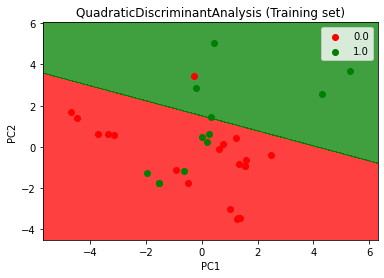

In [119]:

X_set, y_set = X_train_pca, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('QuadraticDiscriminantAnalysis (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

Predict the value of X_test data.
The accuracy of the classifier when features are taken from column number B to N is 0.625.

In [120]:
#Print the  accuracy of testing data
ypred = clf.predict(X_test)

print("Predicted y value of x_test data ",ypred)
accuracy_BN = accuracy_score(y_true=y_test, y_pred=ypred)
print("Accuracy of BN selected classifier ",accuracy_BN)

Predicted y value of x_test data  [0. 0. 0. 0. 0. 0. 0. 0.]
Accuracy of BN selected classifier  0.75


The mean accuracy of X_test value is 0.625


#Print the mean accuracy of testing data
X_test_transformed = scaler.transform(X_test)
clf.score(X_test_transformed, y_test)
mean_accuracy_BN = clf.score(X_test_transformed, y_test)
print("Mean accuracy",mean_accuracy_BN)



The Confusion matrix of the classification when features are from column number B to column number N.
as the percentage of test data is 20% so 20% data of 40 rows is 8 rows.



In [121]:
#Confusion matrix
true_negative, false_positive, false_negative, true_positive = confusion_matrix(y_test,ypred).ravel()
print(true_negative, false_positive, false_negative, true_positive)



6 0 2 0


when cross validation value is 10 the accuracy array below is showing that it is most of the time is between 0.75 and 0.5 and only twice it is 1. 

In [122]:
#Show the 10 fold cross validation
cv_columns_BN_10_fold = cross_val_score(clf, X, y, cv=10,scoring="accuracy")


print("With 10 fold cross validation accuracy array",cv_columns_BN_10_fold)



With 10 fold cross validation accuracy array [0.75 0.75 0.75 1.   0.75 0.75 0.5  0.5  0.75 0.5 ]


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminan

**when cross validation value is 20 the accuracy array below is showing that it is most of the time is  0.5 and only for eight time it is 1. **

In [123]:
#Show the 20 fold cross validation
cv_columns_BN_20_fold =  cross_val_score(clf, X, y, cv=20,scoring="accuracy")
print("With 20 fold cross valiadtion accuracy array", cv_columns_BN_20_fold)

With 20 fold cross valiadtion accuracy array [1.  1.  1.  1.  1.  1.  0.5 0.5 0.5 1.  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 14 members, which is less than n_splits=20.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are colli

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminan

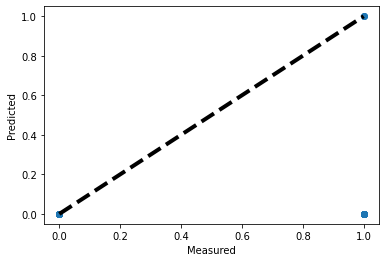

In [124]:
predicted = cross_val_predict(clf, X_train, y_train, cv=10)
fig, ax = plt.subplots()
ax.scatter(y_train, predicted)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

I made a dataframe from cross validations arrays cv_cv_columns_BN_10_fold_df and plotted it. it is showing that most of the time accuracy value is 0.75


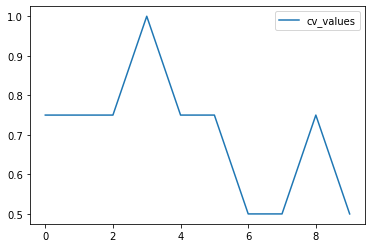

In [125]:

cv_columns_BN_10_fold_df = pd.DataFrame()

cv_columns_BN_10_fold_df["cv_values"] = pd.Series(cv_columns_BN_10_fold)

cv_columns_BN_10_fold_df.plot.line()

I made another dataframe from cross validations arrays cv_cv_columns_BN_20_fold_df and plotted it. it is showing that most of the time accuracy value is 0.50.




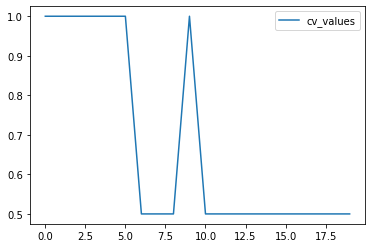

In [126]:
cv_columns_BN_20_fold_df = pd.DataFrame()
cv_columns_BN_20_fold_df["cv_values"] = pd.Series(cv_columns_BN_20_fold)  
cv_columns_BN_20_fold_df.plot.line()



# For the second input features IQ to IZ
**Form a  two dataFrame from all the csv files of chunked_NR and chunked_R folder then combine the two dataframes into one Merged dataFrame. The total number of rows is 40. Here I am taking only columns from IQ to IZ from all the csv files**

** Here input features are columns HR_mean,HR_var,HR_std,HR_sk,HR_ku,Stress_mean,Stress_var,Stress_std,Stress_sk,Stress_ku. Output column feature/ prediction column is the column named Output.**





In [127]:
Merged_dataFrame = []

#Get all the values from Chunked Data NR
columnName_BN = ["HR_mean","HR_var","HR_std","HR_sk","HR_ku","Stress_mean","Stress_var","Stress_std","Stress_sk","Stress_ku"]
     
df_NR = getMergedDataframe(columnName_BN,"drive/colab/pattern_recognition_course/chunkedData_NR/",0)

#Get all the values from Chunked Data R

df_R  = getMergedDataframe(columnName_BN,"drive/colab/pattern_recognition_course/chunkedData_R/",1)

# Appened them to list Merged_dataFrame
Merged_dataFrame.append(df_NR)
Merged_dataFrame.append(df_R)

# covert the list to dataframe
Merged_dataFrame = pd.concat(Merged_dataFrame)
print("Total rows ",Merged_dataFrame.shape[0])
Merged_dataFrame.sample(frac=1)
print("Top first 5 rows")
print(Merged_dataFrame.head(3))

Total rows  40
Top first 5 rows
     HR_mean      HR_var     HR_std  ...  Stress_sk  Stress_ku  Output
0  75.373589  117.100874  10.783752  ...   1.915858   5.422677     0.0
0  77.430518  207.842929  13.613289  ...   0.267008  -0.478493     0.0
0  82.487746  203.662092  13.876020  ...   0.755373  -0.043052     0.0

[3 rows x 11 columns]


**Taking X value/ features from Merged_dataFrame.Here input features are columns HR_mean,HR_var,HR_std,HR_sk,HR_ku,Stress_mean,Stress_var,Stress_std,Stress_sk,Stress_ku. Output column feature/ prediction column is the column named Output.**

In [128]:
#Analysis data from Column IQ to Column IZ

X = Merged_dataFrame[["HR_mean","HR_var","HR_std","HR_sk","HR_ku","Stress_mean","Stress_var","Stress_std","Stress_sk","Stress_ku"]]
   
y = Merged_dataFrame["Output"]
X, y = shuffle(X, y)

#Split training and testing data into 80% and 20%
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

#Scale the input feature X_train
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)



In [129]:
#Create object of QuadraticDiscriminantAnalysis or, Bayes multivariate discriminant classifier
clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train_transformed, y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [130]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train_transformed)
X_test_pca = pca.transform(X_test)

In [131]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


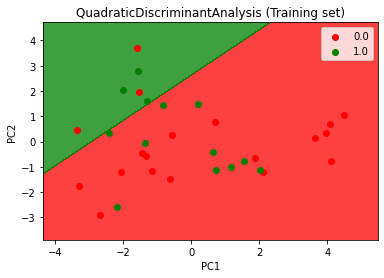

In [133]:
X_set, y_set = X_train_pca, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('QuadraticDiscriminantAnalysis (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

Predict the value of X_test data.
The accuracy of the classifier when features are taken from column number IQ to IZ is .75.

In [134]:
#Print the  accuracy of testing data
ypred = clf.predict(X_test)

print("Predicted y value of x_test data ",ypred)
accuracy_BN = accuracy_score(y_true=y_test, y_pred=ypred)
print("Accuracy of BN selected classifier ",accuracy_BN)

Predicted y value of x_test data  [0. 0. 0. 0. 0. 0. 0. 0.]
Accuracy of BN selected classifier  0.875


In [135]:
#Print the mean accuracy of testing data
X_test_transformed = scaler.transform(X_test)
clf.score(X_test_transformed, y_test)
mean_accuracy_BN = clf.score(X_test_transformed, y_test)
print("Mean accuracy",mean_accuracy_BN)

Mean accuracy 0.875


In [136]:
#Confusion matrix
true_negative, false_positive, false_negative, true_positive = confusion_matrix(y_test,ypred).ravel()
print(true_negative, false_positive, false_negative, true_positive)

7 0 1 0


In [137]:
#Show the 10 fold cross validation
cv_columns_IQIZ_10_fold = cross_val_score(clf, X, y, cv=10,scoring="accuracy")


print("With 10 fold cross validation accuracy array",cv_columns_BN_10_fold)

With 10 fold cross validation accuracy array [0.75 0.75 0.75 1.   0.75 0.75 0.5  0.5  0.75 0.5 ]


In [138]:
#Show the 20 fold cross validation
cv_columns_IQIZ_20_fold =  cross_val_score(clf, X, y, cv=20,scoring="accuracy")
print("With 20 fold cross valiadtion accuracy array", cv_columns_BN_20_fold)

With 20 fold cross valiadtion accuracy array [1.  1.  1.  1.  1.  1.  0.5 0.5 0.5 1.  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 14 members, which is less than n_splits=20.
  % (min_groups, self.n_splits)), UserWarning)


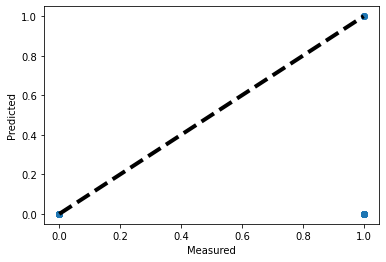

In [139]:
predicted = cross_val_predict(clf, X_train, y_train, cv=10)
fig, ax = plt.subplots()
ax.scatter(y_train, predicted)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

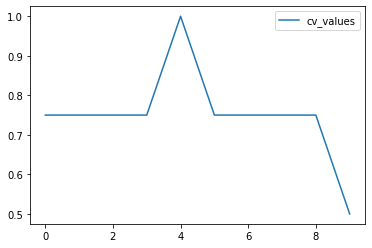

In [140]:
cv_columns_IQIZ_10_fold_df = pd.DataFrame()

cv_columns_IQIZ_10_fold_df["cv_values"] = pd.Series(cv_columns_IQIZ_10_fold)

cv_columns_IQIZ_10_fold_df.plot.line()

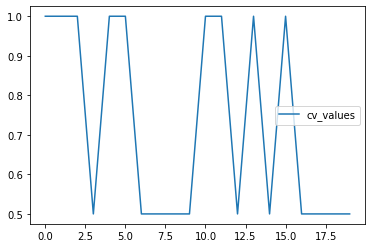

In [141]:
cv_columns_IQIZ_20_fold_df = pd.DataFrame()

cv_columns_IQIZ_20_fold_df["cv_values"] = pd.Series(cv_columns_IQIZ_20_fold)

cv_columns_IQIZ_20_fold_df.plot.line()